In [1]:

import sys
import os
current_dir = os.path.dirname(os.path.abspath('./'))
if not current_dir in sys.path:
    sys.path.append(current_dir)
from combiners import EpochsCombiner
from typing import *
import mne
import tensorflow as tf
import mneflow as mf
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-2*np.pi, 2*np.pi, 100)

# plt.plot(x, tf.keras.activations.linear(x)) # very good
# plt.title('linear')
# plt.show()

# plt.plot(x, tf.nn.relu(x))
# plt.title('relu')
# plt.show()

# plt.plot(x, tf.nn.gelu(x))
# plt.title('gelu')
# plt.show()

# plt.plot(x, tf.nn.elu(x))
# plt.title('elu')
# plt.show()

# plt.plot(x, tf.nn.selu(x))
# plt.title('selu')
# plt.show()

# plt.plot(x, tf.nn.swish(x)) # good
# plt.title('swish')
# plt.show()

# plt.plot(x, tf.nn.softplus(x))
# plt.title('softpuls')
# plt.show()

# plt.plot(x, tf.nn.softsign(x))
# plt.title('sofsign')
# plt.show()

# plt.plot(x, tf.nn.sigmoid(x)) # good
# plt.title('sigmoid')
# plt.show()

# # plt.plot(x, tf.keras.activations.hard_sigmoid(x)) # good
# # plt.title('hard_sigmoid')
# # plt.show()

# plt.plot(x, tf.nn.tanh(x)) # good
# plt.title('tanh')
# plt.show()



2022-01-21 20:20:40.007863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-21 20:20:40.007891: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
content_root = '../'
subjects_folder_path = os.path.join(content_root, 'Source/Subjects')
subject_path = os.path.join(subjects_folder_path, 'Az_Mar_05')
info_path = os.path.join(subject_path, 'Info',
                        'ML_Subject05_P1_tsss_mc_trans_info.pkl')
resp_lock_lm_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_LM_B1_epochs.fif')
resp_lock_rm_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_RM_B1_epochs.fif')
resp_lock_li_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_LI_B1_epochs.fif')
resp_lock_ri_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_RI_B1_epochs.fif')
resp_lock_lm_B1_epochs = mne.read_epochs(resp_lock_lm_B1_epochs_path)
resp_lock_li_B1_epochs = mne.read_epochs(resp_lock_li_B1_epochs_path)
resp_lock_rm_B1_epochs = mne.read_epochs(resp_lock_rm_B1_epochs_path)
resp_lock_ri_B1_epochs = mne.read_epochs(resp_lock_ri_B1_epochs_path)

Reading /home/user/Projects/FingerMovementDecoder/dirty_field/../Source/Subjects/Az_Mar_05/Epochs/RespCor_LM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_309143/432344939.py:14: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_LM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_lm_B1_epochs = mne.read_epochs(resp_lock_lm_B1_epochs_path)


Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading /home/user/Projects/FingerMovementDecoder/dirty_field/../Source/Subjects/Az_Mar_05/Epochs/RespCor_LI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Reading /home/user/Projects/FingerMovementDecoder/dirty_field/../Source/Subjects/Az_Mar_05/Epochs/RespCor_RM_B1_epochs.fif ...


/tmp/ipykernel_309143/432344939.py:15: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_LI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_li_B1_epochs = mne.read_epochs(resp_lock_li_B1_epochs_path)
/tmp/ipykernel_309143/432344939.py:16: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_RM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_rm_B1_epochs = mne.read_epochs(resp_lock_rm_B1_epochs_path)


    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading /home/user/Projects/FingerMovementDecoder/dirty_field/../Source/Subjects/Az_Mar_05/Epochs/RespCor_RI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_309143/432344939.py:17: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_RI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_ri_B1_epochs = mne.read_epochs(resp_lock_ri_B1_epochs_path)


In [4]:
resp_lock_li_B1_epochs.resample(200)
resp_lock_lm_B1_epochs.resample(200)
resp_lock_ri_B1_epochs.resample(200)
resp_lock_rm_B1_epochs.resample(200)

Number of events,30
Events,0: 30
Time range,-0.500 – 0.495 sec
Baseline,off


In [5]:
combiner = EpochsCombiner(
    resp_lock_lm_B1_epochs.copy(),
    resp_lock_li_B1_epochs.copy(),
    resp_lock_rm_B1_epochs.copy(),
    resp_lock_ri_B1_epochs.copy()
)
first_class_indices = (0, 1)
second_class_indices = (2, 3)
combiner.combine(first_class_indices, second_class_indices, shuffle=True)
# combiner = EpochsCombiner(resp_lock_li_B1_epochs, resp_lock_lm_B1_epochs)
# combiner.combine(0, 1, shuffle=True)


from dataclasses import dataclass

# Specify import options
import_opt = dict(
    # path where TFR files will be saved
    savepath='../Source/Subjects/Az_Mar_05/TFR/left_vs_right/',
    out_name='mne_sample_epochs',  # name of TFRecords files
    fs=200,
    input_type='trials',
    target_type='int',
    picks={'meg': 'grad'},
    scale=True,  # apply baseline_scaling
    crop_baseline=True,  # remove baseline interval after scaling
    decimate=None,
    # indices in time axis corresponding to baseline interval
    scale_interval=(0, 60),
    n_folds=5,  # validation set size set to 20% of all data
    overwrite=True,
    segment=False,
    test_set='holdout'
)


In [6]:
meta = mf.produce_tfrecords((combiner.X, combiner.Y), **import_opt)

importing from tuple
input shapes: X- (117, 204, 200) targets- (117, 1)
Preprocessing:
Scaling to interval 0.0 - 60.0
Splitting sets
Preprocessed: (117, 1, 200, 204) (117, 2) folds: 6 x 19
Prepocessed sample shape: (1, 200, 204)
Target shape actual/metadata:  (2,) (2,)
Saving TFRecord# 0


2022-01-20 05:20:19.376181: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-20 05:20:19.376232: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-20 05:20:19.376262: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arcolinux-machine): /proc/driver/nvidia/version does not exist
2022-01-20 05:20:19.377132: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Setting reg for dmx, to l1
Built: dmx input: (None, 1, 200, 204)
Setting reg for tconv, to l1
Built: tconv input: (None, 1, 200, 32)
Setting reg for fc, to l1
Built: fc input: (None, 1, 20, 32)
Input shape: (1, 200, 204)
y_pred: (None, 2)
Initialization complete!
Epoch 1/25
100/100 - 3s - loss: 0.3042 - cat_ACC: 0.8787 - val_loss: 0.2237 - val_cat_ACC: 0.8824 - 3s/epoch - 32ms/step
Epoch 2/25
100/100 - 2s - loss: 0.0270 - cat_ACC: 0.9999 - val_loss: 0.1832 - val_cat_ACC: 0.8824 - 2s/epoch - 15ms/step
Epoch 3/25
100/100 - 1s - loss: 0.0073 - cat_ACC: 1.0000 - val_loss: 0.1686 - val_cat_ACC: 0.8824 - 1s/epoch - 14ms/step
Epoch 4/25
100/100 - 1s - loss: 0.0034 - cat_ACC: 1.0000 - val_loss: 0.1668 - val_cat_ACC: 0.8824 - 1s/epoch - 12ms/step
Epoch 5/25
100/100 - 1s - loss: 0.0020 - cat_ACC: 1.0000 - val_loss: 0.1660 - val_cat_ACC: 0.8824 - 1s/epoch - 13ms/step
Epoch 6/25
100/100 - 1s - loss: 0.0013 - cat_ACC: 1.0000 - val_loss: 0.1641 - val_cat_ACC: 0.8824 - 1s/epoch - 14ms/step
Epoch 7/25

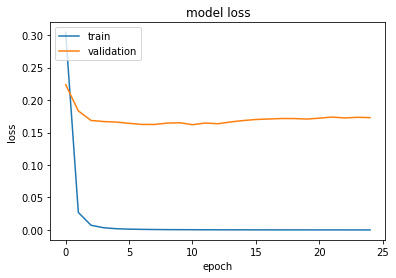

train accuracy: 1.0
train loss: 0.026845987886190414
test accuracy: 0.9473684430122375
test loss: 0.1020812913775444
  {
   train_paths: ['../Source/Subjects/Az_Mar_05/TFR/left_vs_right/mne_sample_epochs_train_0.tfrecord'],
   val_paths: [],
   test_paths: ['../Source/Subjects/Az_Mar_05/TFR/left_vs_right/mne_sample_epochs_test_0.tfrecord'],
   folds: [[array([ 92,  39, 108, 113,  66,  71,   5,  26,  76,  37,  33,  62,   3,
         7,  29,  40,  54,  90,  35]), array([ 36,  16, 101,  69,  53,  72,  18,  49, 100,   6,  52,  57,  12,
        70,  86,   2,  28,  91,  45]), array([  1,  63,   8,  73, 106,  34,  61,  31,  67,  84, 112,  13,  27,
        77,  60,  15,  80,  46,  64]), array([ 17,  25,   0,  74,  55,  21, 102,  75,  51,  96,  94,  32,  88,
       110,  41,  97, 114,  65,  98]), array([ 44,  24,  56,  47,  58,  87,  95,  11,  10,  82, 107,   9,  48,
        59,  79,  81,  68,   4,  42])]],
   test_fold: [array([ 38,  89,  50,  23, 104, 115,  19,  14, 109, 105,  22,  30,  93,
 

In [7]:
# Ivan had 120 Hz
import mneflow as mf
dataset = mf.Dataset(meta, train_batch=100)

lf_params = dict(
    n_latent=32,  # number of latent factors ~ optimal
    # convolutional filter length in time samples ~ increase (its 17 amopng 1000)
    filter_length=25,
    nonlin=tf.keras.activations.elu,
    padding='SAME',
    pooling=10,  # pooling factor (5 - 10)
    stride=10,  # stride parameter for pooling layer
    pool_type='max',
    model_path=import_opt['savepath'],
    dropout=.2,
    l1_scope=["weights"],
    l1=1e-7  # decrease it
)

model = mf.models.LFCNN(dataset, lf_params)
model.build()

model.train(n_epochs=25, eval_step=100, early_stopping=25)
train_loss, train_acc = model.evaluate(meta['train_paths'])
test_loss, test_acc = model.evaluate(meta['test_paths'])

model.plot_hist()


print(f'train accuracy: {train_acc}\ntrain loss: {train_loss}\ntest accuracy: {test_acc}\ntest loss: {test_loss}')


from utils.data_management import dict2str
print(dict2str(meta))

In [8]:
print(
    meta['test_paths']
)
print(
    dict2str(model.dataset.__dict__)
)

print(model.__dict__.keys())
print(model.v_metric)
print(model.v_loss)

['../Source/Subjects/Az_Mar_05/TFR/left_vs_right/mne_sample_epochs_test_0.tfrecord']
  {
   h_params: {
     train_paths: ['../Source/Subjects/Az_Mar_05/TFR/left_vs_right/mne_sample_epochs_train_0.tfrecord'],
     val_paths: [],
     test_paths: ['../Source/Subjects/Az_Mar_05/TFR/left_vs_right/mne_sample_epochs_test_0.tfrecord'],
     folds: [[array([ 92,  39, 108, 113,  66,  71,   5,  26,  76,  37,  33,  62,   3,
         7,  29,  40,  54,  90,  35]), array([ 36,  16, 101,  69,  53,  72,  18,  49, 100,   6,  52,  57,  12,
        70,  86,   2,  28,  91,  45]), array([  1,  63,   8,  73, 106,  34,  61,  31,  67,  84, 112,  13,  27,
        77,  60,  15,  80,  46,  64]), array([ 17,  25,   0,  74,  55,  21, 102,  75,  51,  96,  94,  32,  88,
       110,  41,  97, 114,  65,  98]), array([ 44,  24,  56,  47,  58,  87,  95,  11,  10,  82, 107,   9,  48,
        59,  79,  81,  68,   4,  42])]],
     test_fold: [array([ 38,  89,  50,  23, 104, 115,  19,  14, 109, 105,  22,  30,  93,
        

In [11]:
model.compute_patterns()

Computing patterns: No path specified, using validation dataset (Default)


/tmp/ipykernel_2796204/2340335061.py:18: DeprecationWarning: sfreq cannot be set directly. Please use method inst.resample() instead. This warning will turn into an error after 0.24
  info['sfreq'] = 1.


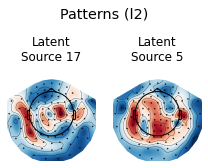

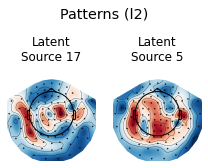

In [12]:
import copy

#b% Completely redone
def plot_patterns(self, info, sorting='l2', components=None, ch_type=None,
                vmin=None, vmax=None, cmap='RdBu_r', sensors=True,
                colorbar=False, units='a.u.', res=64,
                size=1, cbar_fmt='%3.1f', name_format='Latent\nSource %01d',
                show=True, show_names=False, title=None,
                outlines='head', contours=6,
                image_interp='bilinear', average=None,
                sphere=None):
    if not title:
        title=f'Patterns ({sorting})'
    order, ts = self._sorting(sorting)
    self.uorder = order.ravel()
    info = copy.deepcopy(info)
    info['sfreq'] = 1.
    patterns = mne.EvokedArray(self.patterns, info, tmin=0)
    return patterns.plot_topomap(
        times=self.uorder,
        cmap=cmap, colorbar=colorbar, res=res,
        cbar_fmt=cbar_fmt, sensors=sensors, units=None, time_unit='s',
        time_format=name_format, size=size, show_names=show_names,
        title=title, outlines=outlines,
        contours=contours, image_interp=image_interp, show=show, scalings=np.max(patterns.data[:, model.uorder]))


plot_patterns(model, resp_lock_li_B1_epochs.info, 'l2')

TypeError: Dimensions of C (32, 20) are incompatible with X (21) and/or Y (32); see help(pcolor)

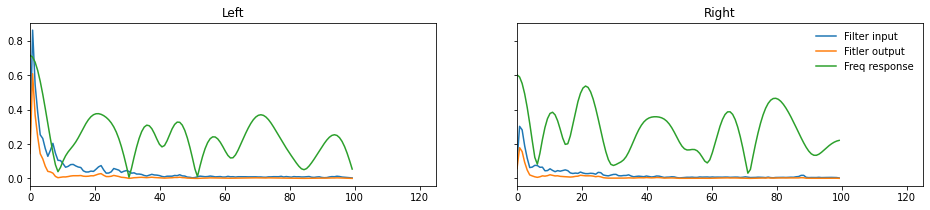

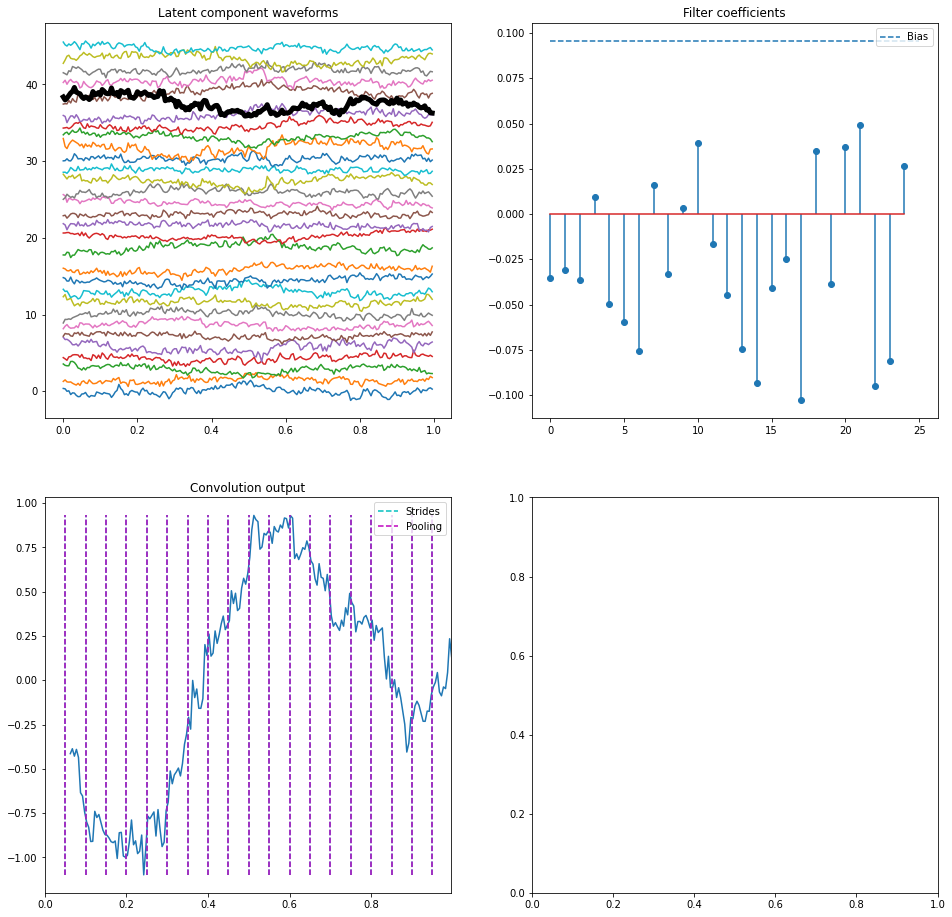

In [13]:
condition_names = ['Left', 'Right']
f2 = model.plot_spectra(sorting='weight_corr',
                        norm_spectra='welch', class_names=condition_names)
f3 = model.plot_waveforms(sorting='compwise_loss', class_names=condition_names)


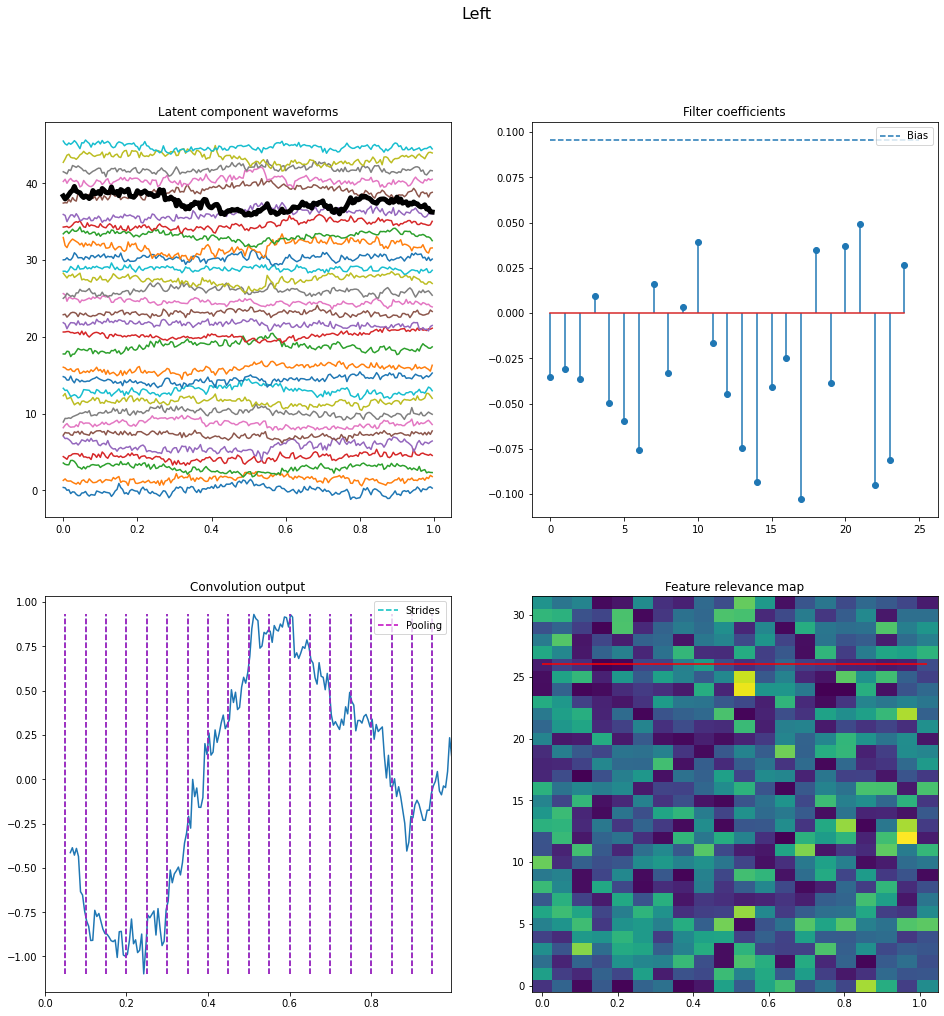

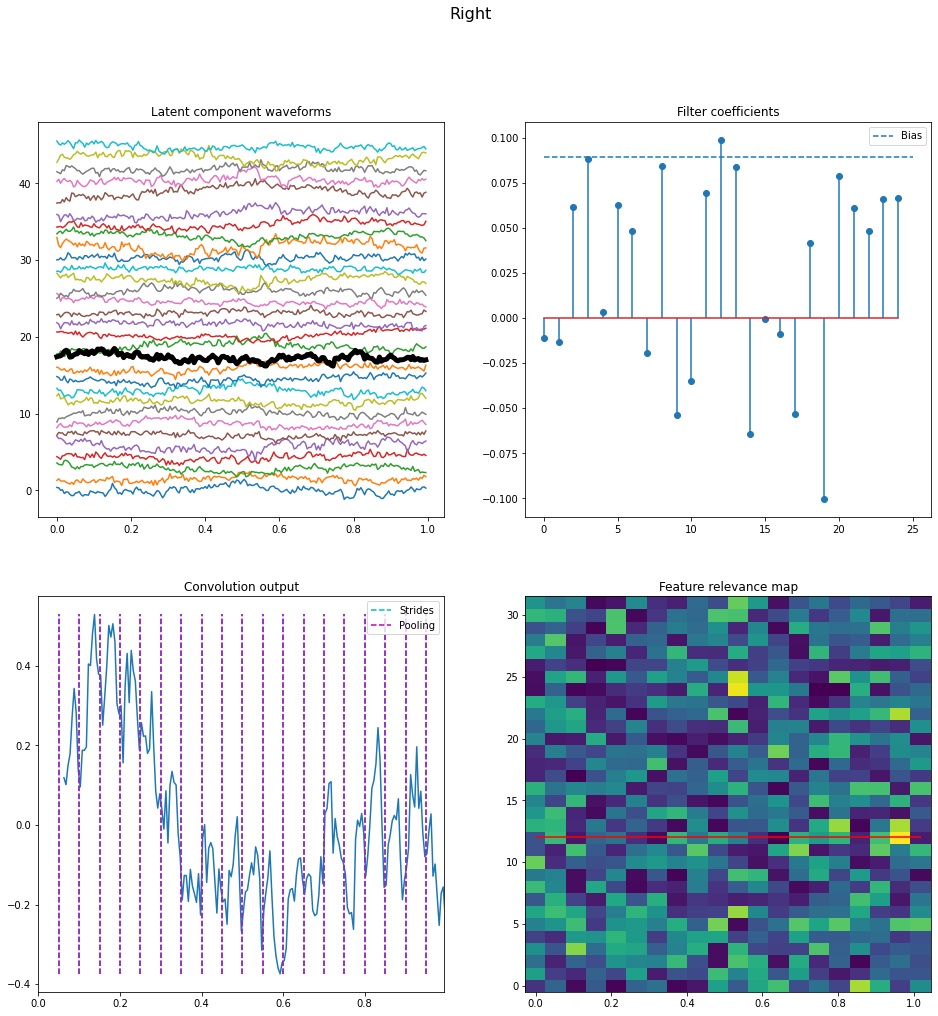

In [14]:
def plot_waveforms(model, sorting='compwise_loss', tmin=0, class_names=None):
    
    fs = model.dataset.h_params['fs']
    if not hasattr(model, 'lat_tcs'):
        model.compute_patterns(model.dataset)

    if not hasattr(model, 'uorder'):
        order, _ = model._sorting(sorting)
        model.uorder = order.ravel()
        #model.uorder = np.squeeze(order)
    if np.any(model.uorder):
        for jj, uo in enumerate(model.uorder):
            f, ax = plt.subplots(2, 2)
            f.set_size_inches([16, 16])
    
            nt = model.dataset.h_params['n_t']
            model.waveforms = np.squeeze(
                    model.lat_tcs.reshape([model.specs['n_latent'], -1, nt]).mean(1))
    
            tstep = 1/float(fs)
            times = tmin + tstep*np.arange(nt)
            scaling = 3*np.mean(np.std(model.waveforms, -1))
            [ax[0, 0].plot(times, wf + scaling*i)
                for i, wf in enumerate(model.waveforms) if i not in model.uorder]
    
            ax[0, 0].plot(times,
                            model.waveforms[uo] + scaling*uo,
                            'k', linewidth=5.)
            ax[0, 0].set_title('Latent component waveforms')
    
            bias = model.tconv.b.numpy()[uo]
            ax[0, 1].stem(model.filters.T[uo], use_line_collection=True)
            ax[0, 1].hlines(bias, 0, len(model.filters.T[uo]),
                            linestyle='--', label='Bias')
            ax[0, 1].legend()
            ax[0, 1].set_title('Filter coefficients')
    
            conv = np.convolve(model.filters.T[uo],
                                model.waveforms[uo], mode='same')
            vmin = conv.min()
            vmax = conv.max()
            ax[1, 0].plot(times + 0.5*model.specs['filter_length']/float(fs),
                            conv)
            #ax[1, 0].hlines(bias, times[0], times[-1], linestyle='--', color='k')
    
            tstep = float(model.specs['stride'])/fs
            strides = np.arange(times[0], times[-1] + tstep/2, tstep)[1:-1]
            pool_bins = np.arange(times[0],
                                    times[-1] + tstep,
                                    model.specs['pooling']/fs)[1:]
    
            ax[1, 0].vlines(strides, vmin, vmax,
                            linestyle='--', color='c', label='Strides')
            ax[1, 0].vlines(pool_bins, vmin, vmax,
                            linestyle='--', color='m', label='Pooling')
            ax[1, 0].set_xlim(times[0], times[-1])
            #ax[1, 0].set_ylim(2*np.min(conv), 2*np.max(conv))
            ax[1, 0].legend()
            ax[1, 0].set_title('Convolution output')
    
            #if model.out_weights.shape[-1] > 1:
            #print(model.F.shape, pool_bins.shape)
            #b% FIXED
            # strides1 = np.arange(times[0], times[-1] + tstep/2, tstep)
            strides1 = np.linspace(times[0], times[-1]+tstep/2, model.F.shape[1])
            ax[1, 1].pcolor(strides1, np.arange(model.specs['n_latent']), 
                            model.F)
            #b% FIXED
            # ax[1, 1].hlines(uo + .5, pool_bins[0], pool_bins[-1], color='r')
            ax[1, 1].hlines(uo, strides1[0], strides1[-1], color='r')
            # else:
            #     ax[1, 1].stem(model.out_weights[:, uo, :])
    
            ax[1, 1].set_title('Feature relevance map')
            #f.show()
            if class_names:
                comp_name = class_names[jj]
            else:
                comp_name = "Class " + str(jj)
            f.suptitle(comp_name, fontsize=16)
        return f

condition_names = ['Left', 'Right']
f = plot_waveforms(model, sorting='compwise_loss', class_names=condition_names)

In [28]:
model = mf.models.EEGNet(dataset, lf_params)
model.build()


Batchnorm: (None, 204, 1001, 32)
Pooling 1: (None, 1, 200, 64)
Batchnorm 2: (None, 1, 200, 64)
Pooling 2: (None, 1, 20, 64)
Built: fc input: (None, 1, 20, 64)
Input shape: (1, 1001, 204)
y_pred: (None, 2)
Initialization complete!


In [ ]:
model.train(n_epochs=25, eval_step=100, early_stopping=5)
model.plot_hist()


Epoch 1/25


2021-11-30 14:24:17.456727: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 810281472 exceeds 10% of free system memory.
2021-11-30 14:24:17.671678: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 810281472 exceeds 10% of free system memory.
2021-11-30 14:24:17.672136: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 810281472 exceeds 10% of free system memory.
2021-11-30 14:24:17.672774: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 810281472 exceeds 10% of free system memory.
2021-11-30 14:24:19.488984: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 810281472 exceeds 10% of free system memory.
